In [0]:
'Please Enter your DOT Email address.'
user_email_address = 'your.name@dot.gov'

In [0]:
import json

# Revise the directory path. We recommend to create git_clone under your Workspace directory. 
# Modify the 'paths' dictionary if you want to create under nested directory in Workspace.

# Define paths
paths = {
    "Requirement_path": f'/Workspace/Users/{user_email_address}/CHARISMA/environment/requirements.txt',
    "Code_path": f'/Workspace/Users/{user_email_address}/CHARISMA/ground-penetrating-radar/Cover depth measurement/code/',
    "Data_path": f'/Workspace/Users/{user_email_address}/CHARISMA/ground-penetrating-radar/Cover depth measurement/data/'
}

# Save paths to a JSON file
with open('paths.json', 'w') as f:
    json.dump(paths, f)

In [0]:
# Install CHARISMA
%pip install -r "{paths['Requirement_path']}"

# Restart Kernel
dbutils.library.restartPython()

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Using cached matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
Using cached matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.4
    Uninstalling matplotlib-3.8.4:
      Successfully uninstalled matplotlib-3.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.5.1 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.
ydata-profiling 4.5.1 requires pandas!=1.4.0,<2.1,>1.1, but you have pandas 2.2.0 which is incompatible.
ydata-profiling 4.5.1 requires scipy<1.12,>=1.4.1, but you have scipy 1.12.0 which is incompatible.
Note: you may need to restart the kerne

In [0]:
# Since we restarted kernel
import json

# Load paths from the JSON file
with open('paths.json', 'r') as f:
    paths = json.load(f)

# Retrieve individual paths
Code_path = paths["Code_path"]
Data_path = paths["Data_path"]

In [0]:
import sys
sys.path.append(Code_path)
from tqdm import tqdm
import warnings
from RebarCoverDepth import RebarCoverDepth
from DztToCsvConverter import DztToCsvConverter
from ContourProcessor import ContourProcessor
from XMLReader import XMLReader
import download_unzip as du
import GPR_plot
warnings.filterwarnings('ignore')
import mlflow
mlflow.autolog(disable=True)

Extracting GPR Zone 01.zip: 100%|██████████| 437M/437M [00:44<00:00, 9.82MB/s]


Extracted contents from GPR Zone 01.zip


Extracting GPR Zone 02.zip: 100%|██████████| 500M/500M [00:47<00:00, 10.5MB/s]


Extracted contents from GPR Zone 02.zip


Extracting GPR Zone 03.zip: 100%|██████████| 325M/325M [00:36<00:00, 8.83MB/s]


Extracted contents from GPR Zone 03.zip


Extracting GPR Zone 04.zip: 100%|██████████| 308M/308M [00:33<00:00, 9.28MB/s]


Extracted contents from GPR Zone 04.zip


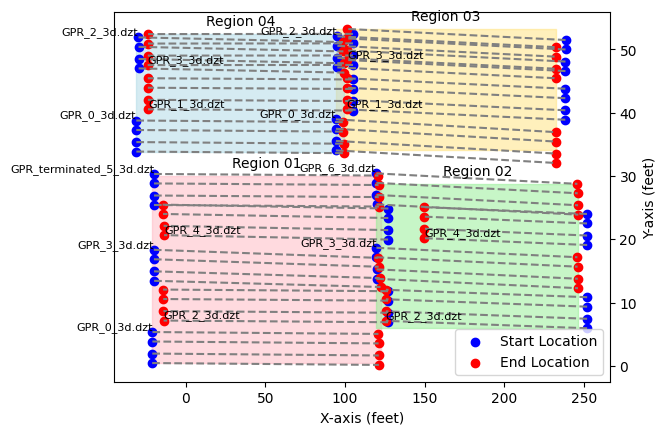

In [0]:
#Data path
home_dir = Data_path

#Download the GPR data
txt_file = home_dir + 'download_link.txt'
du.download_data_from_links(txt_file, home_dir)

#Unzip the GPR data
du.unzip_all(home_dir)

#Read XML file and create coordinate dataframe
xml_file = home_dir + '28-000002_2019-05-21_GPR.xml'
xml_reader = XMLReader(xml_file)
df_coord = xml_reader.df_coord

In [0]:
# Iterate over zones
for zone in tqdm(range(1, 5), desc="Converting DZT to CSV"):
    file_path = home_dir + f'GPR Zone {zone:02d}'
    converter = DztToCsvConverter(df_coord, zone, file_path)
    converter.process_dzt_files()

print("Conversion from DZT to CSV completed.")

Converting DZT to CSV: 100%|██████████| 4/4 [02:15<00:00, 33.88s/it]

Conversion from DZT to CSV completed.


In [0]:
#Processing Zone 01
cover_depth_01 = RebarCoverDepth(df_coord,
                                 1, #zone_number
                                 670, #chunk_size
                                 5, #gpr_lanes
                                 home_dir, #home_dir
                                 10, #window
                                 0, #alpha
                                 0, #t0
                                 0, #tmax
                                 8.5, #rhf_espr
                                 0.15, #vmin
                                 0.70, #vmax
                                 100, #num_clusters
                                 0.53, #amplitude_threshold
                                 8, #depth_threshold
                                 20, #minimal_y_index
                                 1.5, #redundancy_filter
                                 0.27) #scaling_factor

x_points_list_01, y_points_list_01, z_points_list_01, df_chunk_01, time0ed_01, gained_01, dewowed_01, bgrmed_01, migrated_01, contrasted_01, located_01 = cover_depth_01.execute_rebar_mapping()
cover_depth_01.plot_combined_zone_contour(x_points_list_01, y_points_list_01, z_points_list_01, cover_depth_01.zone_number)

In [0]:
# To check the raw data:
#GPR_plot.Plot_b_scan_advanced(df_chunk_01[0][0],0.7)

# To check the time_zeroed data:
#GPR_plot.Plot_b_scan_advanced(time0ed_01[0][0],0.7)

# To check the migrated data:
#GPR_plot.Plot_b_scan_advanced(migrated_01[0][0],0.7)

In [0]:
#anomaly correction on zone 2
grouped_df = df_coord.groupby('Zone')
zone_df = grouped_df.get_group('02')
df_coord.loc[28:31, 'Start_X'] = df_coord.loc[20:23, 'Start_X'].values
df_coord.loc[28:31, 'End_X'] = df_coord.loc[20:23, 'End_X'].values

In [0]:
#Processing Zone 02
cover_depth_02 = RebarCoverDepth(df_coord,
                                 2, #zone_number
                                 670, #chunk_size
                                 4, #gpr_lanes
                                 home_dir, #home_dir
                                 10, #window
                                 0, #alpha
                                 0, #t0
                                 0, #tmax
                                 8.5, #rhf_espr
                                 0.15, #vmin
                                 0.70, #vmax
                                 100, #num_clusters
                                 0.53, #amplitude_threshold
                                 8, #depth_threshold
                                 20, #minimal_y_index
                                 1.5, #redundancy_filter
                                 0.27) #scaling_factor

x_points_list_02, y_points_list_02, z_points_list_02, df_chunk_02, time0ed_02, gained_02, dewowed_02, bgrmed_02, migrated_02, contrasted_02, located_02 = cover_depth_02.execute_rebar_mapping()
cover_depth_02.plot_combined_zone_contour(x_points_list_02, y_points_list_02, z_points_list_02, cover_depth_02.zone_number)

In [0]:
#Processing Zone 03
cover_depth_03 = RebarCoverDepth(df_coord,
                                 3, #zone_number
                                 670, #chunk_size
                                 3, #gpr_lanes
                                 home_dir, #home_dir
                                 10, #window
                                 0, #alpha
                                 0, #t0
                                 0, #tmax
                                 8.5, #rhf_espr
                                 0.15, #vmin
                                 0.70, #vmax
                                 100, #num_clusters
                                 0.53, #amplitude_threshold
                                 8, #depth_threshold
                                 20, #minimal_y_index
                                 1.5, #redundancy_filter
                                 0.27) #scaling_factor

x_points_list_03, y_points_list_03, z_points_list_03, df_chunk_03, time0ed_03, gained_03, dewowed_03, bgrmed_03, migrated_03, contrasted_03, located_03 = cover_depth_03.execute_rebar_mapping()
cover_depth_03.plot_combined_zone_contour(x_points_list_03, y_points_list_03, z_points_list_03, cover_depth_03.zone_number)

In [0]:
#Processing Zone 04
cover_depth_04 = RebarCoverDepth(df_coord,
                                 4, #zone_number
                                 670, #chunk_size
                                 3, #gpr_lanes
                                 home_dir, #home_dir
                                 10, #window
                                 0, #alpha
                                 0, #t0
                                 0, #tmax
                                 8.5, #rhf_espr
                                 0.15, #vmin
                                 0.70, #vmax
                                 100, #num_clusters
                                 0.53, #amplitude_threshold
                                 8, #depth_threshold
                                 20, #minimal_y_index
                                 1.5, #redundancy_filter
                                 0.27) #scaling_factor

x_points_list_04, y_points_list_04, z_points_list_04, df_chunk_04, time0ed_04, gained_04, dewowed_04, bgrmed_04, migrated_04, contrasted_04, located_04 = cover_depth_04.execute_rebar_mapping()
cover_depth_04.plot_combined_zone_contour(x_points_list_04, y_points_list_04, z_points_list_04, cover_depth_04.zone_number)

In [0]:
# Define the comprehensive list
lists = {}
lists['01'] = (x_points_list_01, y_points_list_01, z_points_list_01)
lists['02'] = (x_points_list_02, y_points_list_02, z_points_list_02)
lists['03'] = (x_points_list_03, y_points_list_03, z_points_list_03)
lists['04'] = (x_points_list_04, y_points_list_04, z_points_list_04)

#plot the contours
processor = ContourProcessor()
processor.contour_scan_area_only(lists)
processor.contour_interpolate_entire(lists)